<a href="https://colab.research.google.com/github/farzin23i/SciSchool-Introduction_to_Machine_Learning/blob/main/week3/ML_3_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cluster Analysis
Is a subset of unsupervised learning methods

### Clustering
* Applications of clustering are as follows
  - Automatically organizing the data
  - Labeling data
  - Understanding hidden structure of data
  - News Cloustering for grouping similar news together
  - Customer Segmentation
  - Suggest social groups

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.style.use ('seaborn')

In [ ]:
from sklearn.datasets import make_blobs, make_moons

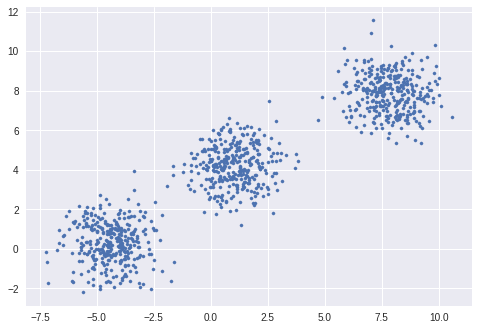

In [ ]:
X, _ = make_blobs(n_features=2, n_samples=1000, centers=3, cluster_std=1, random_state=3)
plt.scatter(X[:,0], X[:,1], s=10, )

### Distance or Similarity Function
* Data belonging to same cluster are similar & data belonging to different cluster are different. 
* We need mechanisms to measure similarity & differences between data. 
* This can be achieved using any of the below techniques.

 - Minkowiski breed of distance calculation: 
 
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">
 

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
X = [[0, 1], [1, 1], [1, 1.75]]
# X = np.random.normal(0,1,(100,2))

In [ ]:
euclidean_distances(X, X)

array([[0.  , 1.  , 1.25],
       [1.  , 0.  , 0.75],
       [1.25, 0.75, 0.  ]])

In [ ]:
euclidean_distances(X, [[0,0]])

array([[1.        ],
       [1.41421356],
       [2.01556444]])

### Clustering as an Optimization Problem
* Maximize inter-cluster distances
* Minimize intra-cluster distances

### Types of Clustering
* Partitioning methods
  - Partitions n data into k partitions
  - Initially, random partitions are created & gradually data is moved across different partitions.
  - It uses distance between points to optimize clusters.
  - KMeans & Meanshift are examples of Partitioning methods
* Hierarchical methods
  - These methods does hierarchical decomposition of datasets.
  - One approach is, assume each data as cluster & merge to create a bigger cluster
  - Another approach is start with one cluster & continue splitting
* Density-based methods
  - All above techniques are distance based & such methods can find only spherical clusters and not suited for clusters of other shapes.
  - Continue growing the cluster untill the density exceeds certain threashold.

###  Partitioning Method
#### KMeans
* Minimizing creteria : within-cluster-sum-of-squares.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/kmeans2.png?raw=true">

##### KMeans Algorithm
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif)

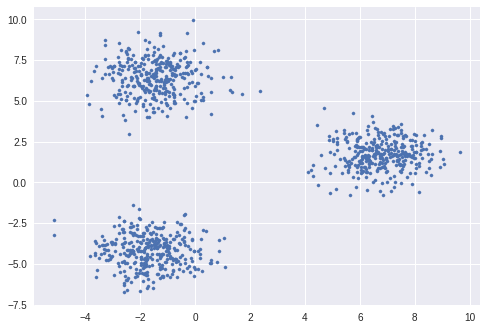

In [ ]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=1)
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
from sklearn.cluster import KMeans, MeanShift

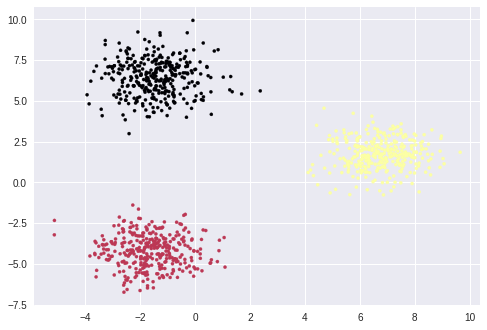

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X), cmap='inferno' ,)

In [ ]:
kmeans.predict(X)

In [ ]:
kmeans.cluster_centers_

array([[-1.44137131,  6.40483253],
       [-1.64749098, -4.20766995],
       [ 6.74950376,  1.70853353]])

In [ ]:
kmeans.labels_

In [ ]:
inertias = []
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    inertias.append(kmeanModel.inertia_) 


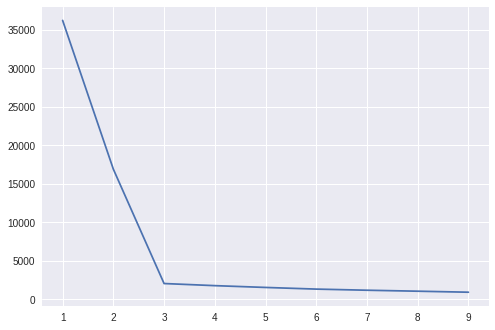

In [ ]:
plt.plot (K,inertias)

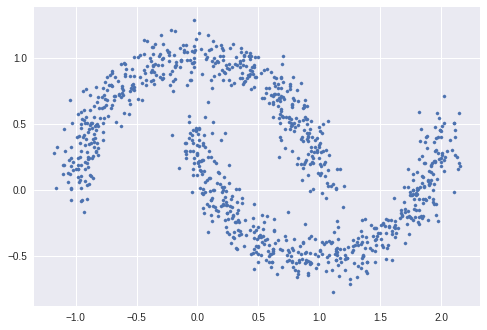

In [ ]:
X, y = make_moons(n_samples=1000, noise=.09)

plt.scatter(X[:,0], X[:,1],s=10, cmap='inferno')

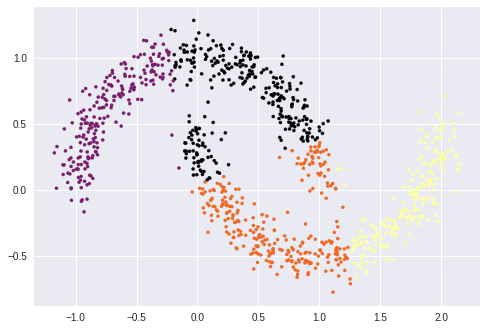

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X), cmap='inferno')

#### Limitations of KMeans
* Assumes that clusters are convex & behaves poorly for elongated clusters.
* Probability for participation of data to multiple clusters.
* KMeans tries to find local minima & this depends on init value.

#### Meanshift
* Centroid based clustering algorithm.
* Mode can be understood as highest density of data points.

In [ ]:
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

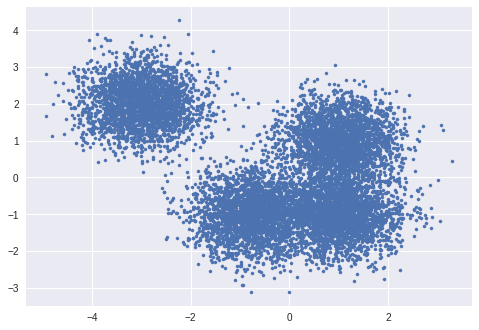

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10)

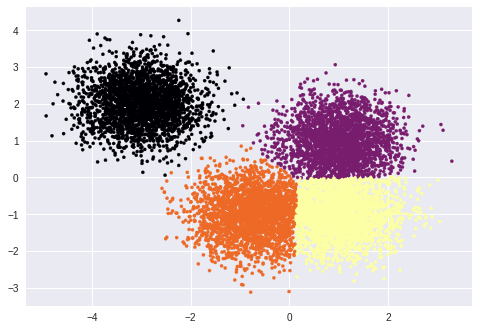

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X), cmap='inferno')

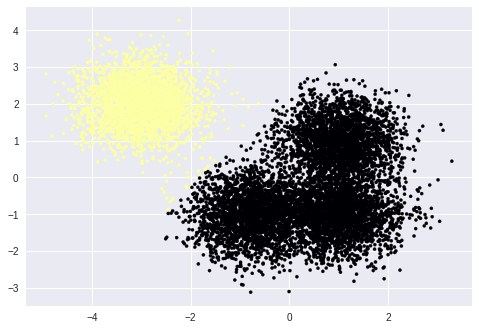

In [ ]:
ms = MeanShift()
ms.fit(X)

plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X), cmap='inferno')

### Hierarchial Clustering
* A method of clustering where you combine similar clusters to create a cluster or split a cluster into smaller clusters such they now they become better.

#### Agglomerative method
* Start with assigning one cluster to each data. 
* Combine clusters which have higher similarity.


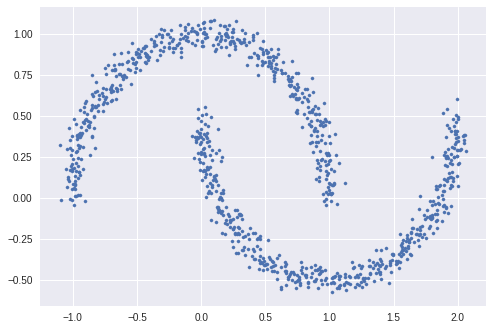

In [ ]:
X, y = make_moons(n_samples=1000, noise=.05)
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

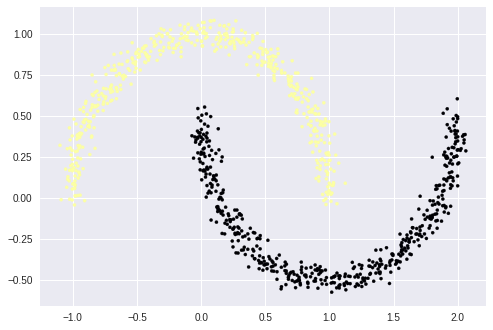

In [ ]:
agc = AgglomerativeClustering(linkage='single')
agc.fit(X)

plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_, cmap='inferno')

### Density Based Clustering - DBSCAN

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

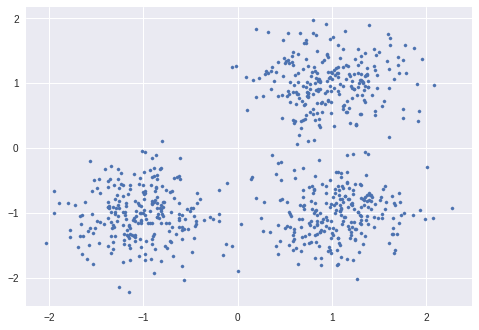

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

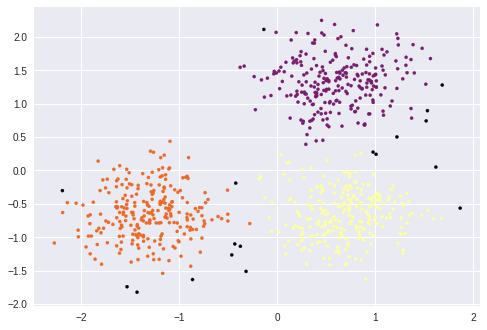

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10,c=labels, cmap='inferno')

### Measuring Performance of Clusters
* Two forms of evaluation 
* supervised, which uses a ground truth class values for each sample.
  - completeness_score
  - homogeneity_score
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

##### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [ ]:
from sklearn.metrics.cluster import completeness_score

In [ ]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [ ]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


In [ ]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

* The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]  

##### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

In [ ]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [ ]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [ ]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

In [ ]:
homogeneity_score([0, 0, 1, 1], [1, 1, 1, 1])

0.0

* Same class data is broken into two clusters